In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('student-mat.csv', sep=';')

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

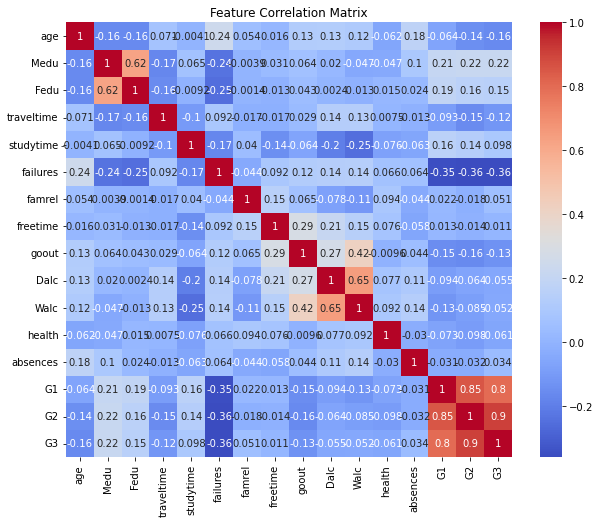

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

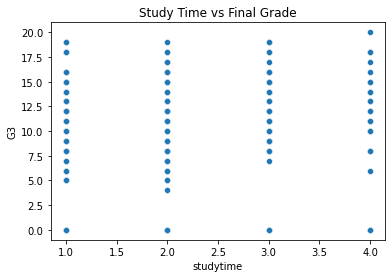

In [18]:
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grade')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
# Encode categorical features
df['school'] = LabelEncoder().fit_transform(df['school'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

In [24]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['studytime', 'absences', 'G1', 'G2']])

In [26]:
df[['studytime', 'absences', 'G1', 'G2']] = scaled_features

In [40]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic'],
      dtype='object')


In [42]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [44]:
df_encoded.head()

,school,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,18,4,4,2,-0.042286,0,4,3,...,1,0,1,0,0,0,1,1,0,0
1,0,0,17,1,1,1,-0.042286,0,5,3,...,0,0,0,1,0,0,0,1,1,0
2,0,0,15,1,1,1,-0.042286,3,4,3,...,1,0,1,0,1,0,1,1,1,0
3,0,0,15,4,2,1,1.150779,0,3,2,...,1,0,0,1,1,1,1,1,1,1
4,0,0,16,3,3,1,-0.042286,0,4,3,...,0,0,0,1,1,0,1,1,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_encoded.drop(columns=['G3'])
y = df_encoded['G3']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f'MSE: {mse}')
print(f'R² score: {r2}')

MSE: 5.656642833231223
R² score: 0.724134123697402


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()

In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

In [70]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.7s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.7s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=20, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=20, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=20, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [72]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 30, 'n_estimators': 200}
